In [1]:
import sys
import numpy as np
import math

sys.path.append("../rover_planner")
from a_star import AStarPlanner

In [8]:
def open_og_grid(og_path):
    with open(og_path, 'rb') as f:
        og = np.load(f)
    return og

out_path = '../dataset/Map_4'
og_path = '../dataset/Mapset/OG_X_11736_12736_Y_5972_6972.npy'
occupancy_grid = open_og_grid(og_path)

Find goal


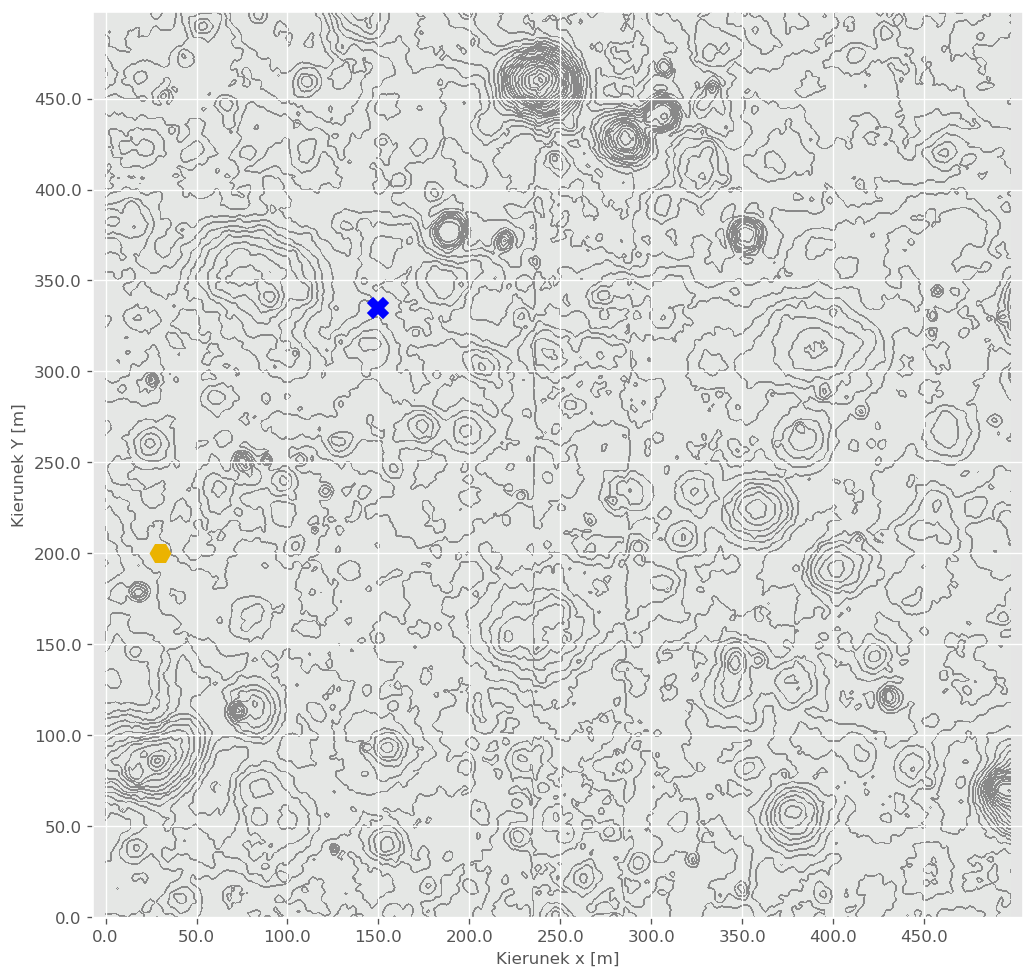

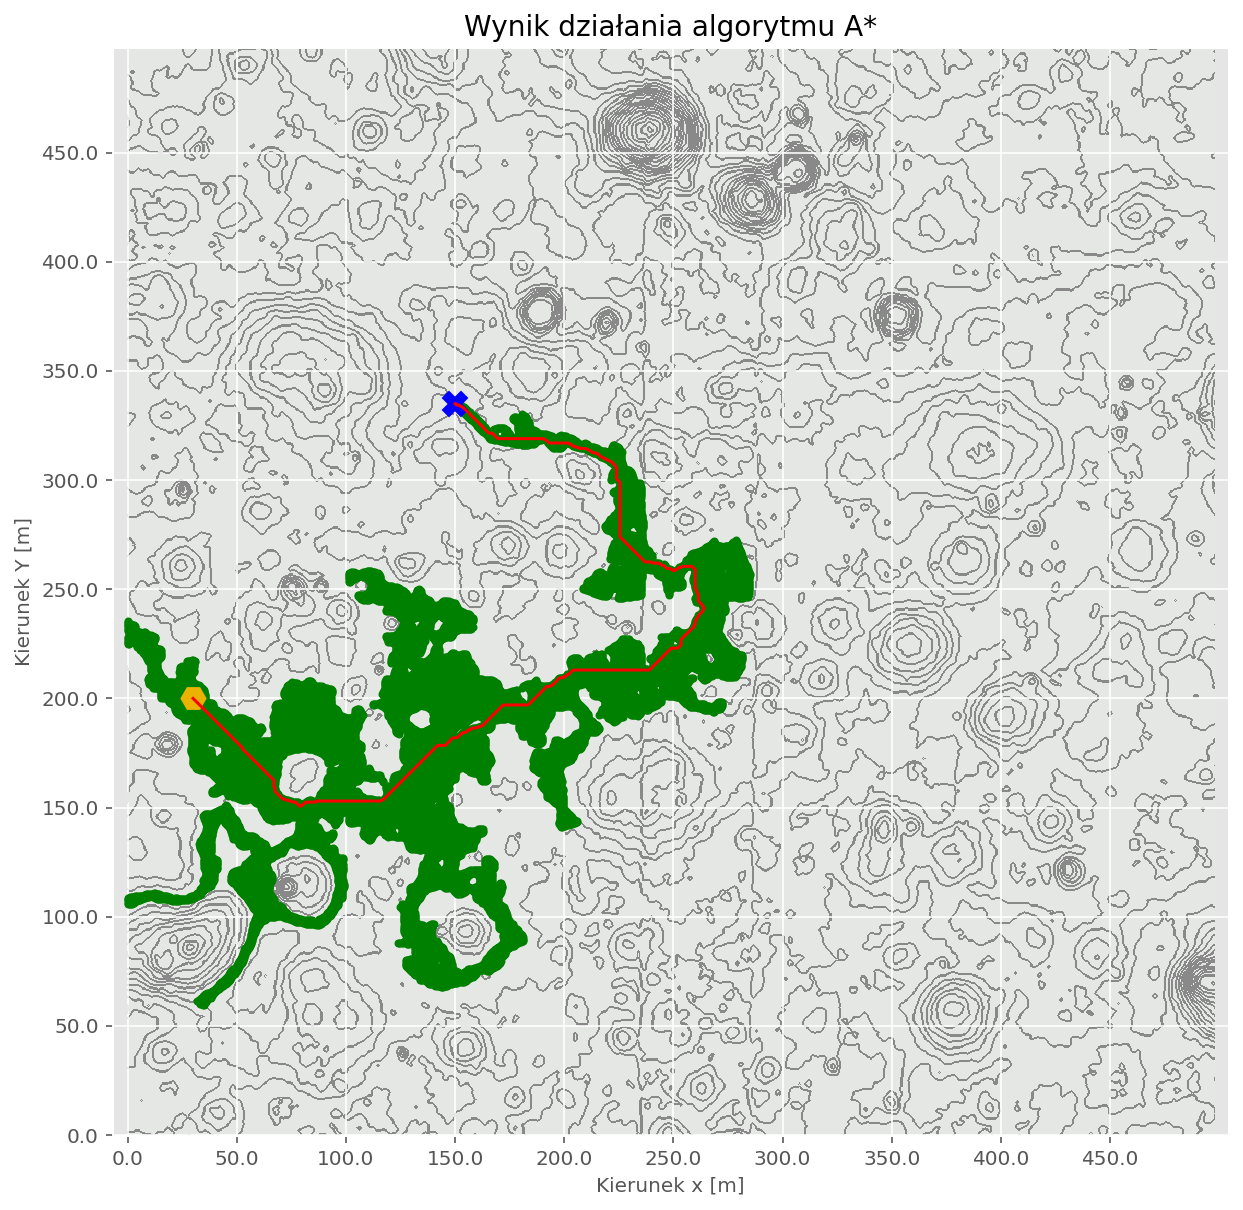

In [9]:
sx = 400.0  # [m]
sy = 60.0  # [m]
gx = 335.0*2  # [m]
gy = 150.0*2 # [m]
grid_size = 0.5 # 0.5  # [m]
robot_radius = 1.0  # [m]

a_star = AStarPlanner(resolution=grid_size, rr=robot_radius, obstacle_map=occupancy_grid, show_animation=True,
                     out_path=out_path, step=100)
a_star.set_goals(sx, sy, gx, gy)
#a_star.plot_start_end_points()
rx, ry = a_star.planning()
a_star.plot_searched_points()

In [4]:

print(a_star.iterations, round(a_star.path_length,2), round(a_star.exec_time,2))

58325 479.09 7.4


In [6]:
stats = a_star.get_statistics()
print(stats)

{'Map width [m]': 498.0, 'Map height [m]': 498.0, 'Path length [m]': 479.09, 'Execution time [s]': 7.4006, 'Algorythm iterations [-]': 58325}


In [5]:
print(len(a_star.rx)/2)

404.0
